# Projet - Taux de conversion 

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("conversion_data.csv")
df.head()

FileNotFoundError: [Errno 2] File b'conversion_data.csv' does not exist: b'conversion_data.csv'

## Import des données et première analyse

In [103]:
# Dimension du dataset
df.shape

(316200, 6)

In [0]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [0]:
# Quel est le pourcentage de conversion ? 
print(round(df.converted.sum()/len(df) * 100, 2), "%")  

# Nous sommes proches de la moyenne métier de 3%. 

3.23 %


In [0]:
# Y a-t-il des valeurs manquantes ? 
df.isnull().any()

# Il n'y a pas de valeurs manquantes dans le dataset. 

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [0]:
# Y a-t-il des valeurs aberrantes ?
df.describe()
# Il y a des valeurs aberrantes sur l'âge puisque le maximum est à 123 ans. 

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


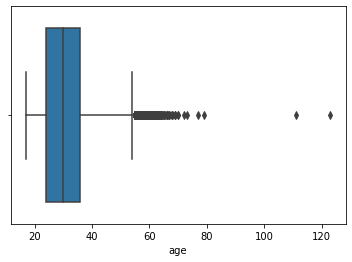

In [0]:
# Regardons de plus près les valeurs aberrantes
ax = sns.boxplot(x = df["age"])

# En effet, on s'aperçoit qu'il y a des valeurs aberrantes au delà de 100 ans. 

In [0]:
# On peut supprimer les valeurs aberrantes
df = df.query ("age < 100")

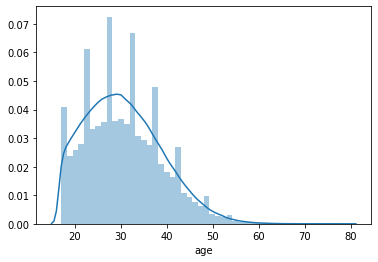

In [0]:
# Distribution de la variable Âge 
sns.distplot(df.age)

# L'âge est concentré sur la trentaine. 
# Les utilisateurs de plus de 50 ans sont moins représentés. 

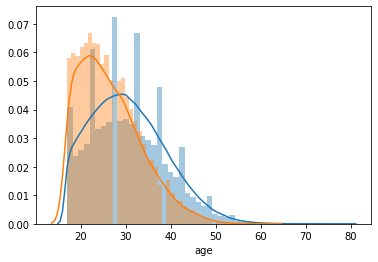

In [0]:
df_converted = df.query ('converted == 1')
sns.distplot(df.age)
sns.distplot(df_converted.age)
# Les utilisateurs qui convertissent sont plus jeunes, ils s'approchent davantage de la vingtaine. 

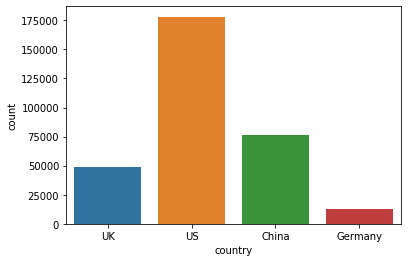

In [0]:
# Histogramme des pays 
sns.countplot(x = "country", data = df)
# Une majorité des utilisateurs est d'origine américaine. 

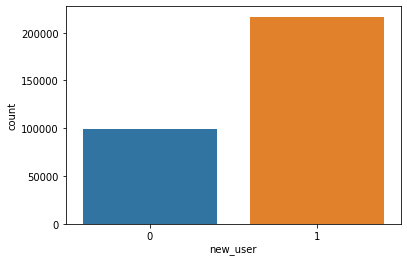

In [0]:
# Histogramme des utilisateurs 
sns.countplot(x = "new_user", data = df)
# Une majorité d'utilisateurs sont de nouveaux utilisateurs 

In [0]:
# df.age.plot(kind='pie', subplots = True, figsize=(8, 8))

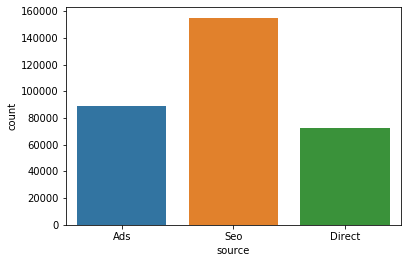

In [0]:
# Histogramme des sources 
sns.countplot(x = "source", data = df)
# La plupart des utilisateurs arrivent sur le site par le biais du référencement naturel. 

KeyboardInterrupt: ignored

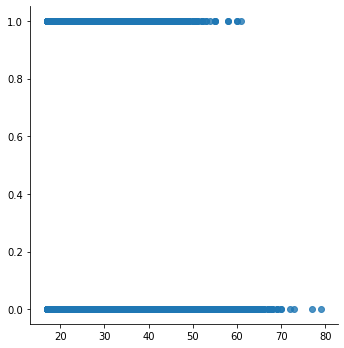

In [0]:
sns.lmplot(x = "age", y = "converted", data = df)

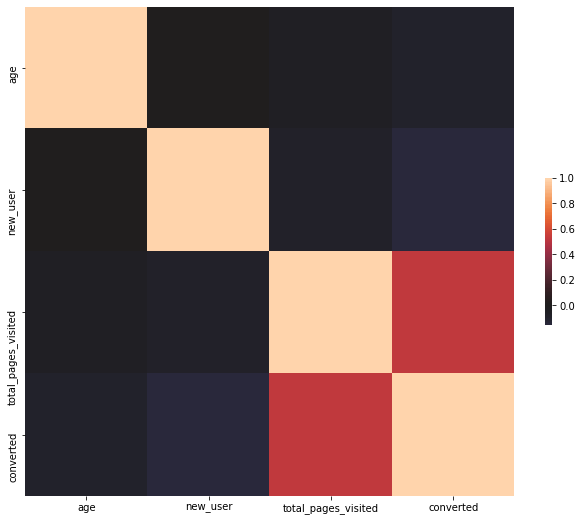

In [0]:
# Matrice de corrélation
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, square=True,  
            center=0, cbar_kws={"shrink": .3})

# La conversion est principalement correlée au nombre de pages visitées

## Modélisation des données

### Régression logistique

In [0]:
# Import des librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# Création de la variable cible
Y = df.converted

In [0]:
# Création des variables explicatives
X = df.iloc[:,:-1]

In [107]:
# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1


In [0]:
# Création des datasets d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 42)

In [0]:
# Normalisation des variables explicatives
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
# Entraînement du modèle 
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Prédictions sur les données d'entraînement
Y_train_pred = classifier.predict(X_train)

In [0]:
# Prédictions sur les données de test
Y_test_pred = classifier.predict(X_test)

In [0]:
# Performances du modèle
print("Accuracy on train set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on train set :  0.9859626453659109
Accuracy on test set :  0.986685641998735


In [0]:
# Matrices de confusion
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[213327    845]
 [  2262   4904]]

Confusion matrix on test set : 
[[91487   341]
 [  922  2110]]



Text(0.5, 1, 'Confusion Matrix')

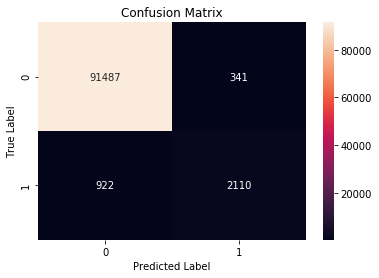

In [0]:
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot = True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [0]:
# Cross-validation k-fold

X = np.append(X_train,X_test,axis = 0)
Y = np.append(Y_train,Y_test)

scores = cross_val_score(classifier, X, Y, cv=5)
predictions = cross_val_predict(classifier, X, Y, cv=5)

print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.98575269 0.98610057 0.98619545 0.98632173 0.98649568]


In [0]:
X

array([[-0.55273889,  0.67796585, -0.56273399, ..., -1.13705659,
         1.83398184, -0.97981849],
       [ 0.77643896,  0.67796585, -0.26302319, ..., -1.13705659,
        -0.54526167,  1.02059719],
       [ 1.01810766,  0.67796585,  0.63610923, ..., -1.13705659,
        -0.54526167, -0.97981849],
       ...,
       [-0.67357324,  0.67796585,  0.33639843, ...,  0.8794637 ,
        -0.54526167,  1.02059719],
       [ 1.25977636,  0.67796585, -0.26302319, ...,  0.8794637 ,
        -0.54526167, -0.97981849],
       [-0.79440759,  0.67796585, -0.56273399, ..., -1.13705659,
         1.83398184, -0.97981849]])

In [0]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, Y)
feature_importance 

(array([5.80903279e+00, 9.59932641e-01, 4.71097371e+00, 2.43012049e-01,
        9.76423374e-01, 6.01298297e-01, 3.19118226e-03, 2.78200997e-01]),
 array([0.01594406, 0.32720385, 0.02997067, 0.62203907, 0.32308342,
        0.4380831 , 0.95495102, 0.59788278]))

In [0]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
age,5.809033,0.015944
total_pages_visited,4.710974,0.029971
country_UK,0.976423,0.323083
new_user,0.959933,0.327204
country_US,0.601298,0.438083
source_Seo,0.278201,0.597883
country_Germany,0.243012,0.622039
source_Direct,0.003191,0.954951


In [0]:
y=[index for index in feature_ranking.index]
y

['age',
 'new_user',
 'total_pages_visited',
 'country_Germany',
 'country_UK',
 'country_US',
 'source_Direct',
 'source_Seo']

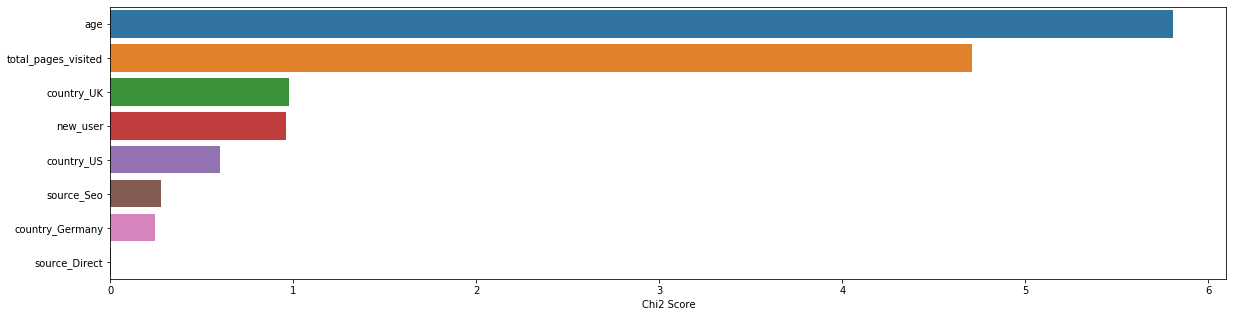

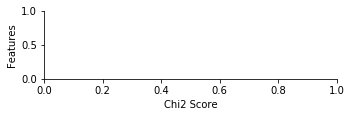

In [0]:
fig, ax = plt.subplots(figsize=(20,5))
ax =sns.catplot(x="Chi2 Score", y=[index for index in feature_ranking.sort_values("Chi2 Score" , ascending=False).index], data = feature_ranking.sort_values("Chi2 Score", ascending=False), kind="bar" , ax=ax)
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

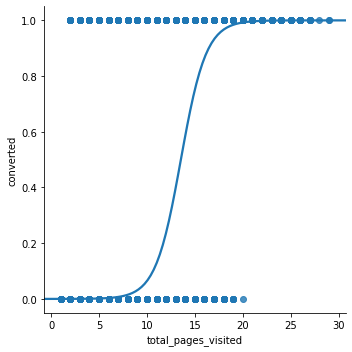

In [0]:
sns.lmplot(x="total_pages_visited", y="converted", data = df , logistic=True)

### Random Forest

array([[-0.91333302,  0.67662003, -0.26196866, ..., -1.13607399,
        -0.54499351, -0.98200875],
       [-0.55065796,  0.67662003, -0.56144724, ..., -1.13607399,
         1.83488424, -0.98200875],
       [-1.63868313,  0.67662003, -0.56144724, ..., -1.13607399,
        -0.54499351, -0.98200875],
       ...,
       [ 0.5373672 , -1.47793438, -0.56144724, ...,  0.88022436,
        -0.54499351,  1.01832087],
       [-0.18798291,  0.67662003, -0.56144724, ...,  0.88022436,
        -0.54499351, -0.98200875],
       [ 0.05380046,  0.67662003,  0.03750992, ..., -1.13607399,
        -0.54499351,  1.01832087]])

In [0]:
X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X, Y, test_size = 0.3 )

In [0]:
X_train_tree = X_train_tree.drop(columns='total_pages_visited')
X_test_tree = X_test_tree.drop(columns='total_pages_visited')

In [132]:
X_train_tree

,age,new_user,country_Germany,country_UK,country_US,source_Direct,source_Seo
269080,23,1,1,0,0,0,0
53787,26,1,0,0,0,1,0
261153,17,1,0,1,0,0,0
22845,39,1,0,1,0,0,0
229593,36,1,0,0,0,0,0
...,...,...,...,...,...,...,...
119879,27,1,0,0,0,1,0
259178,26,1,0,0,1,1,0
131932,35,0,0,0,1,0,1
146867,29,1,0,0,1,0,0


In [270]:
clf_tree = DecisionTreeClassifier(class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
classifier_gini = clf_tree.fit(X_train_tree, Y_train_tree) #training the algorithm
classifier_gini




DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [291]:
classifier_gini.score(X_train_tree,Y_test_tree)

ValueError: ignored

In [0]:
Y_train_pred2 = classifier_gini.predict(X_train_tree)

In [0]:
Y_test_pred2 = classifier_gini.predict(X_test_tree)

In [273]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train_tree, Y_train_pred2))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test_tree, Y_test_pred2))
print()

Confusion matrix on train set : 
[[191033  23081]
 [  3700   3526]]

Confusion matrix on test set : 
[[81935  9951]
 [ 1513  1461]]



In [274]:
feature_ranking_tree1 = pd.DataFrame(data=classifier_gini.feature_importances_, index=X_train_tree.columns)
feature_ranking_tree1 = feature_ranking_tree1.rename(columns={0 :'Score'})
feature_ranking_tree1.sort_values("Score", ascending=False)

,Score
new_user,0.610550
age,0.177839
country_Germany,0.106356
country_US,0.080725
country_UK,0.024529
source_Direct,0.000000
source_Seo,0.000000


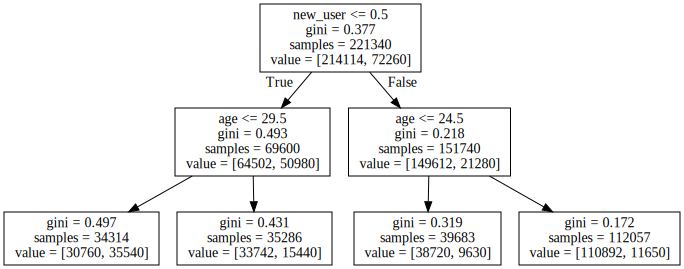

In [269]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_gini, out_file=None, feature_names = X_train_tree.columns)
graph = graphviz.Source(dot_data)
graph

In [229]:
X_train_tree

,age,new_user,country_Germany,country_UK,country_US,source_Direct,source_Seo
269080,23,1,1,0,0,0,0
53787,26,1,0,0,0,1,0
261153,17,1,0,1,0,0,0
22845,39,1,0,1,0,0,0
229593,36,1,0,0,0,0,0
...,...,...,...,...,...,...,...
119879,27,1,0,0,0,1,0
259178,26,1,0,0,1,1,0
131932,35,0,0,0,1,0,1
146867,29,1,0,0,1,0,0


In [283]:
classifier = DecisionTreeClassifier(class_weight={0:1, 1:10})

params = {
    
    
    'max_depth' : [4,6,8,10],
    'max_features':[2,3,4]

    
}

best_classifier = GridSearchCV(classifier , param_grid= params, verbose=4)
best_classifier.fit(X_train_tree, Y_train_tree)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=4, max_features=2 .....................................
[CV] ......... max_depth=4, max_features=2, score=0.944, total=   0.1s
[CV] max_depth=4, max_features=2 .....................................
[CV] ......... max_depth=4, max_features=2, score=0.895, total=   0.1s
[CV] max_depth=4, max_features=2 .....................................
[CV] ......... max_depth=4, max_features=2, score=0.862, total=   0.1s
[CV] max_depth=4, max_features=3 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] ......... max_depth=4, max_features=3, score=0.910, total=   0.1s
[CV] max_depth=4, max_features=3 .....................................
[CV] ......... max_depth=4, max_features=3, score=0.907, total=   0.1s
[CV] max_depth=4, max_features=3 .....................................
[CV] ......... max_depth=4, max_features=3, score=0.904, total=   0.1s
[CV] max_depth=4, max_features=4 .....................................
[CV] ......... max_depth=4, max_features=4, score=0.919, total=   0.1s
[CV] max_depth=4, max_features=4 .....................................
[CV] ......... max_depth=4, max_features=4, score=0.877, total=   0.1s
[CV] max_depth=4, max_features=4 .....................................
[CV] ......... max_depth=4, max_features=4, score=0.893, total=   0.1s
[CV] max_depth=6, max_features=2 .....................................
[CV] ......... max_depth=6, max_features=2, score=0.879, total=   0.1s
[CV] max_depth=6, max_features=2 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10], 'max_features': [2, 3, 4]},
             pre_dispatch='2*n_jobs', ref

In [284]:
best_classifier.best_params_

{'max_depth': 4, 'max_features': 3}

AttributeError: ignored

In [0]:
Y_train_pred1 = best_classifier.predict(X_train_tree)

In [0]:
Y_test_pred1 = best_classifier.predict(X_test_tree)

In [287]:
print("Accuracy on train set : ", accuracy_score(Y_train_tree, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test_tree, Y_test_pred))

Accuracy on train set :  0.9673533929700913
Accuracy on test set :  0.9686485346826903


In [288]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train_tree, Y_train_pred1))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test_tree, Y_test_pred1))
print()

Confusion matrix on train set : 
[[196971  17143]
 [  4903   2323]]

Confusion matrix on test set : 
[[84525  7361]
 [ 2071   903]]



In [292]:
best_classifier.best_estimator_.feature_importances_

array([2.05792533e-01, 7.46611165e-01, 2.93958104e-03, 8.26765426e-03,
       3.36797926e-02, 2.32848433e-03, 3.80790059e-04])

In [293]:
feature_ranking_tree = pd.DataFrame(data=best_classifier.best_estimator_.feature_importances_, index=X_train_tree.columns)
feature_ranking_tree = feature_ranking_tree.rename(columns={0 :'Score'})
feature_ranking_tree.sort_values("Score", ascending=False)

,Score
new_user,0.746611
age,0.205793
country_US,0.033680
country_UK,0.008268
country_Germany,0.002940
source_Direct,0.002328
source_Seo,0.000381


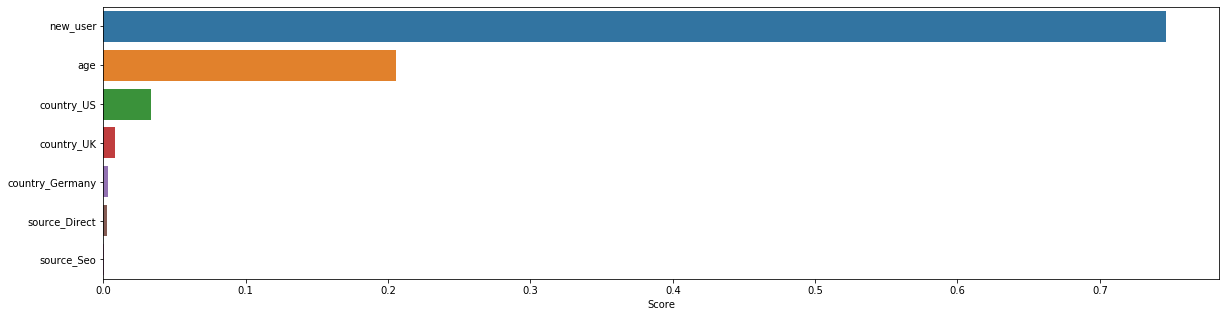

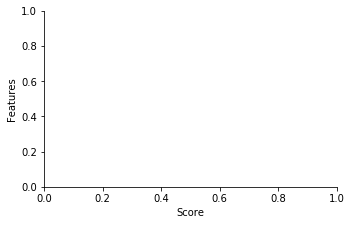

In [294]:
fig, ax = plt.subplots(figsize=(20,5))
ax =sns.catplot(x="Score", y=[index for index in feature_ranking_tree.sort_values("Score" , ascending=False).index], data = feature_ranking_tree.sort_values("Score", ascending=False), kind="bar" , ax=ax)
ax.set(xlabel="Score", ylabel="Features")
plt.show()